In [192]:
 # Tarea 4 
#Algoritmos de Aprendizaje no Supervisado

#Iván Yesid Garzón Gutiérrez
#Audry Carolina Giraldo Trujillo 


In [188]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [33]:
import pandas as pd  # Asegúrate de haber importado pandas

# Cargar archivo CSV en un DataFrame
# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo
df = pd.read_csv('Mall_Customers.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga
print("Primeras filas del archivo cargado:")
df.head(7)


Primeras filas del archivo cargado:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [57]:
import pandas as pd

# Cargar el dataset
dataset = pd.read_csv("Mall_Customers.csv")

# Ver las dimensiones del dataset (número de filas y columnas)
print(dataset.shape)


(200, 5)


In [99]:
data=dataset.drop(['Gender'], axis=1)

In [101]:
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [103]:
data.describe()

,CustomerID,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


In [105]:
data.isna().sum()

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [107]:
data.dropna()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


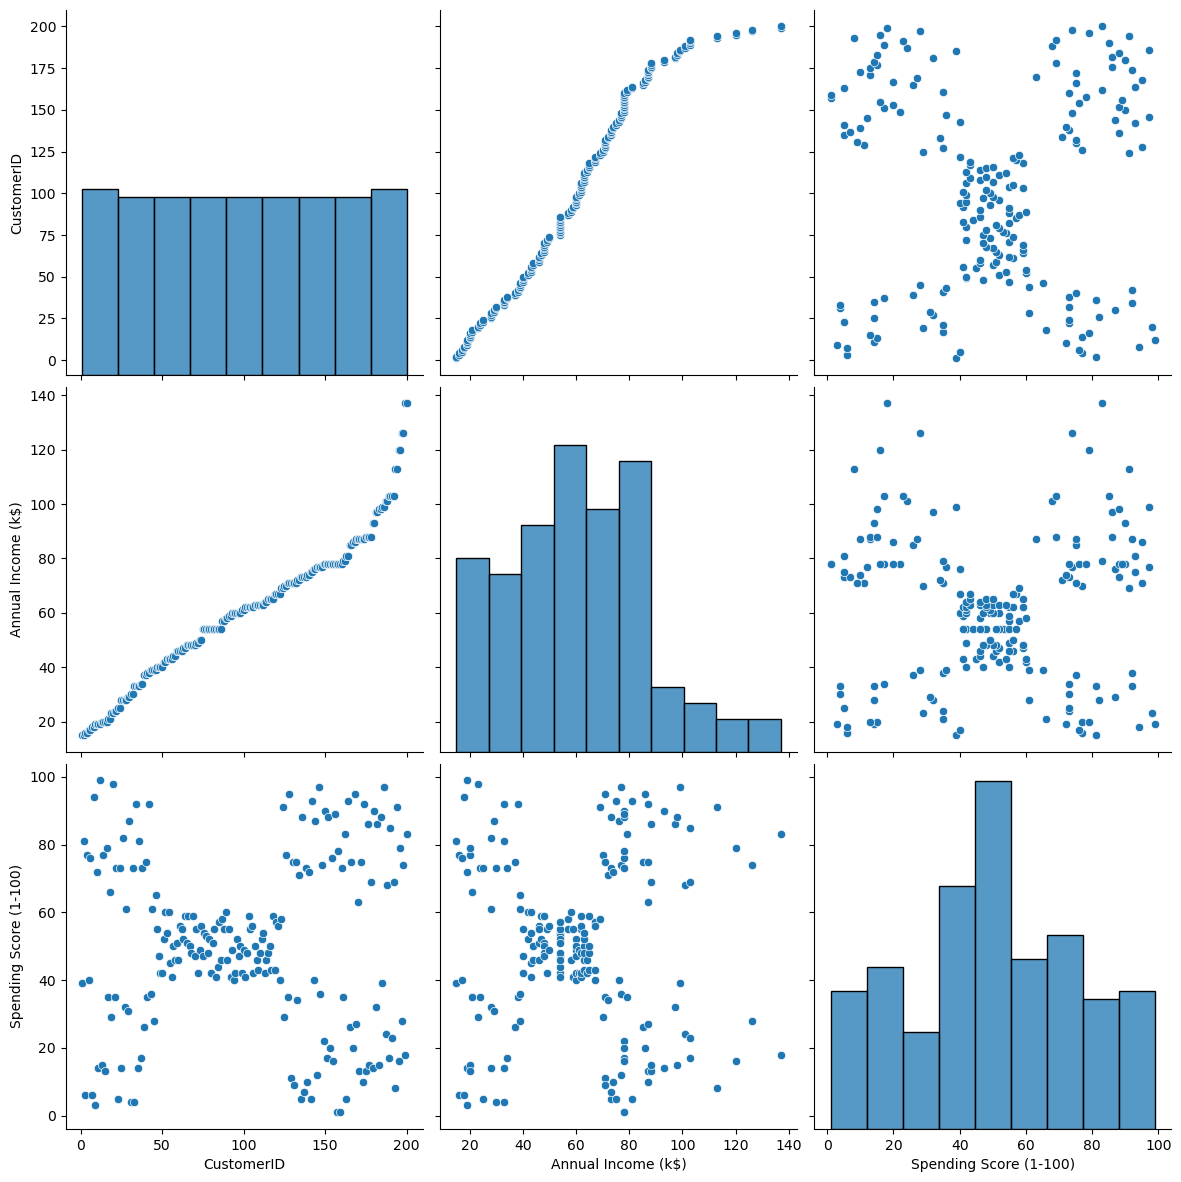

In [109]:
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [111]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,CustomerID,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.977548,0.013835
Annual Income (k$),0.977548,1.000000,0.009903
Spending Score (1-100),0.013835,0.009903,1.000000


<Axes: >

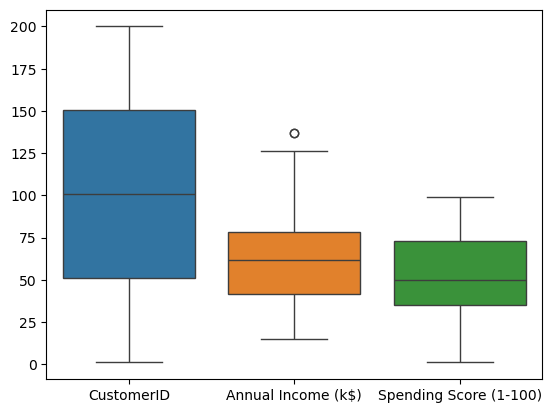

In [113]:
# Diagramas de caja para cada variable por especie
sns.boxplot(data=data)

In [115]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.738999,-0.434801
1,-1.706091,-1.738999,1.195704
2,-1.688771,-1.700830,-1.715913
3,-1.671450,-1.700830,1.040418
4,-1.654129,-1.662660,-0.395980
...,...,...,...
195,1.654129,2.268791,1.118061
196,1.671450,2.497807,-0.861839
197,1.688771,2.497807,0.923953
198,1.706091,2.917671,-1.250054


K-MEANS

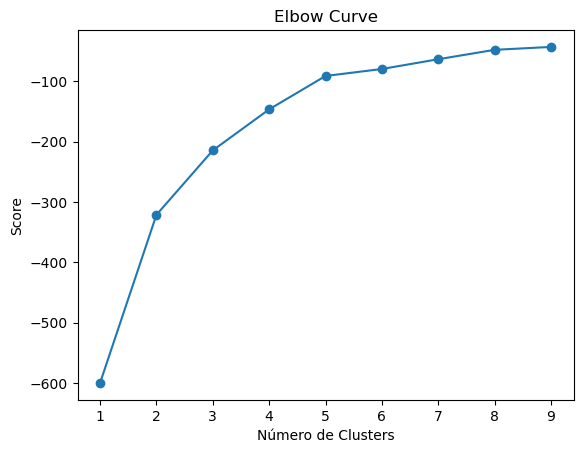

In [121]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [123]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.71881007, -0.67090765, -0.01904579],
       [ 0.99835851,  0.92220892,  1.15056272],
       [ 1.02928406,  0.97103028, -1.18114598]])

In [125]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

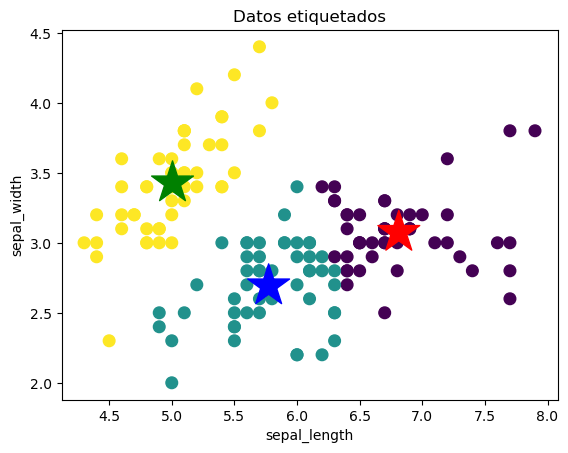

In [135]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Aplicar K-means clustering con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X[['sepal_length', 'sepal_width']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualización
f1 = X['sepal_length'].values
f2 = X['sepal_width'].values
asignar = labels
colores = ['red', 'blue', 'green']

plt.scatter(f1, f2, c=asignar, s=70, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()


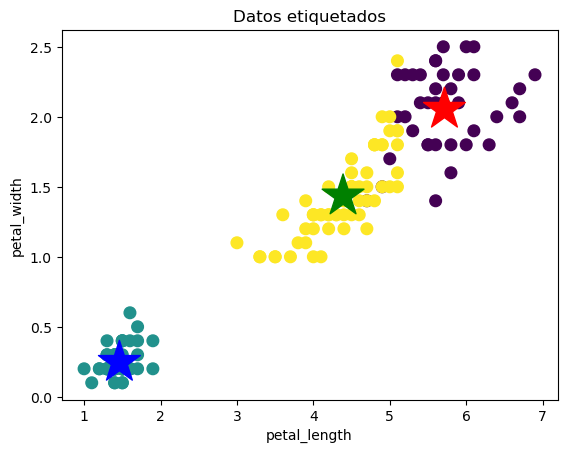

In [139]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Aplicar K-means clustering con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualización para petal_length y petal_width
f1 = X['petal_length'].values
f2 = X['petal_width'].values
asignar = labels
colores = ['red', 'blue', 'green']

plt.scatter(f1, f2, c=asignar, s=70, cmap='viridis')
plt.scatter(centroids[:, 2], centroids[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()


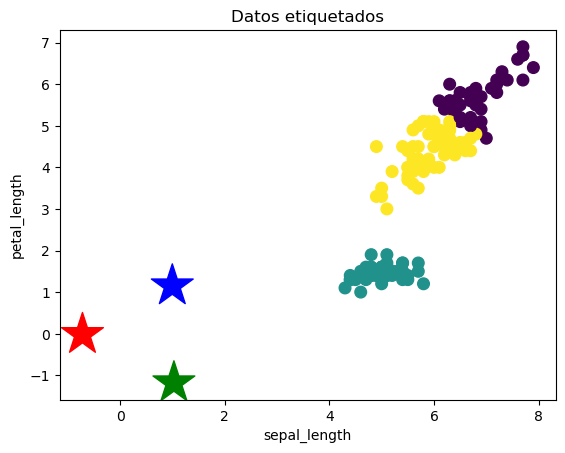

In [141]:

f1 = X['sepal_length'].values
f2 = X['petal_length'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

In [143]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[1]
['blue']


In [145]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.551191604619592
Índice de Calinski-Harabasz: 561.5937320156642
Inertia (suma de cuadrados dentro de los clusters): 78.85566582597731
Davies-Bouldin Index: 0.6660385791628468


Hierarchical clustering

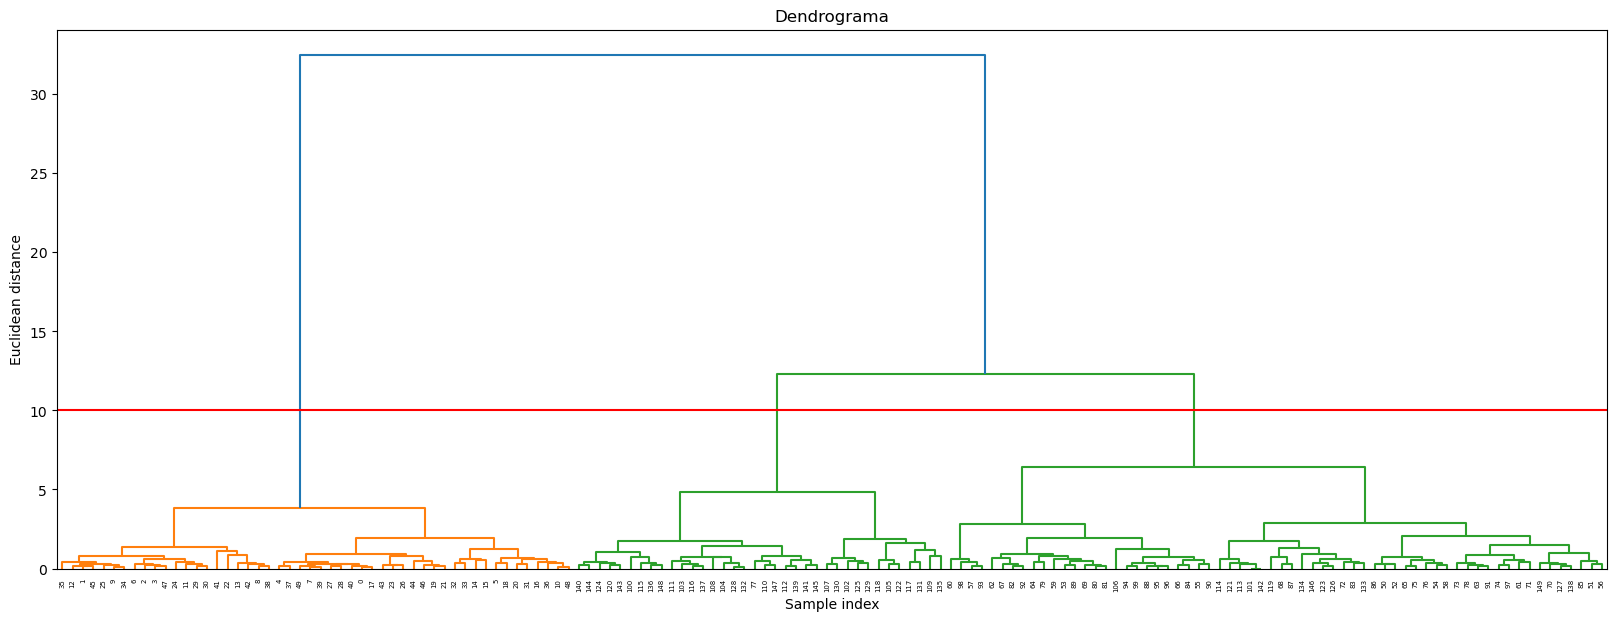

In [148]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [150]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [152]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

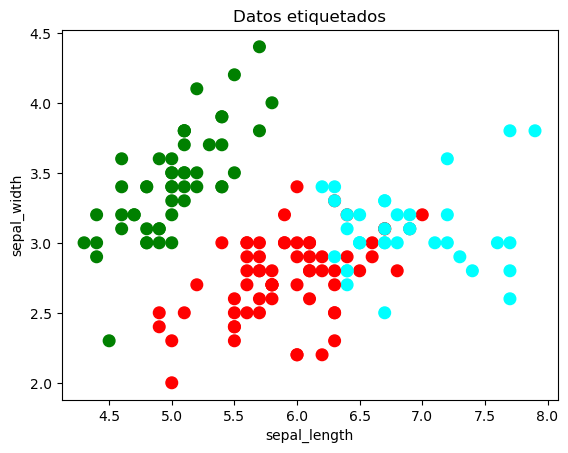

In [154]:
f1 = X['sepal_length'].values
f2 = X['sepal_width'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

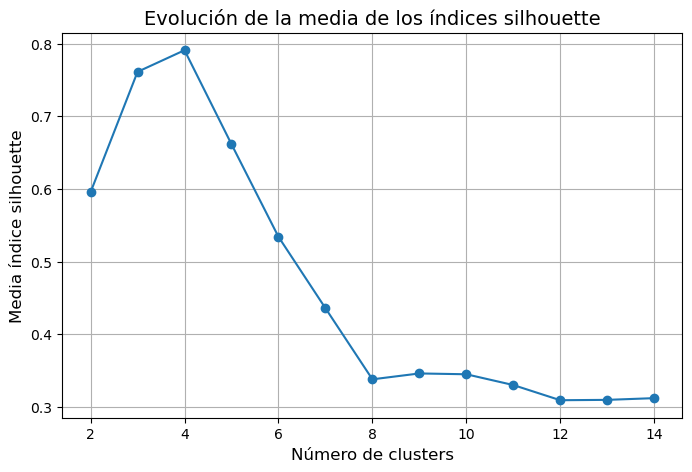

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, random_state=42)

# Rango de número de clusters a evaluar
range_n_clusters = range(2, 15)

# Lista para almacenar los valores medios de silhouette
valores_medios_silhouette = []

# Evaluar el índice silhouette para cada número de clusters
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(metric='euclidean', linkage='ward', n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Gráfica de la evolución del índice silhouette
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o', linestyle='-')
ax.set_title('Evolución de la media de los índices silhouette', fontsize=14)
ax.set_xlabel('Número de clusters', fontsize=12)
ax.set_ylabel('Media índice silhouette', fontsize=12)
ax.grid(True)
plt.show()


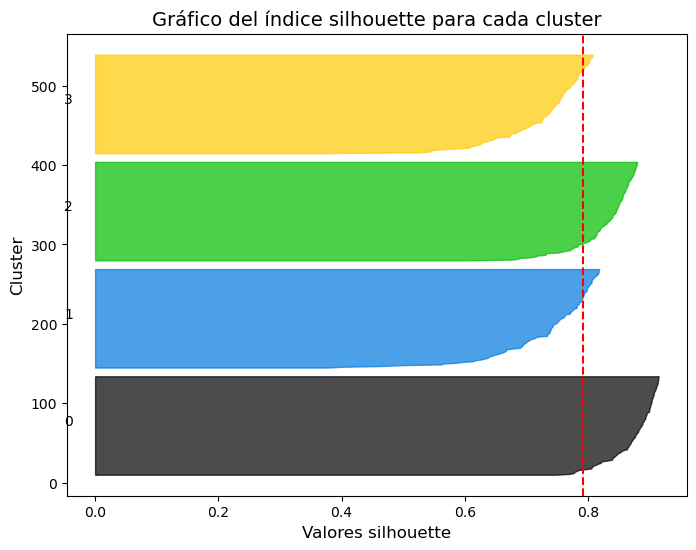

In [176]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

n_clusters = 4  # Número óptimo de clusters identificado
clusterer = AgglomerativeClustering(metric='euclidean', linkage='ward', n_clusters=n_clusters)
cluster_labels = clusterer.fit_predict(X)
silhouette_vals = silhouette_samples(X, cluster_labels)

y_lower = 10
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Gráfico del índice silhouette para cada cluster", fontsize=14)
ax.set_xlabel("Valores silhouette", fontsize=12)
ax.set_ylabel("Cluster", fontsize=12)
ax.axvline(x=silhouette_score(X, cluster_labels), color="red", linestyle="--")
plt.show()


In [180]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Aplicar clustering jerárquico (sin especificar affinity, ya que Ward usa Euclidean por defecto)
clusterer = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_hier = clusterer.fit_predict(X)

# Calcular medidas de calidad
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))



Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.7911042588289479
Índice de Calinski-Harabasz: 5742.035759058726
Davies-Bouldin Index: 0.29385150725841225


In [182]:
hier_clustering = AgglomerativeClustering(n_clusters=2)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [184]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.5955207405315346
Índice de Calinski-Harabasz: 574.8890256995833
Davies-Bouldin Index: 0.5196230252590877


In [186]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.9535766746824166, array([190.6138535 , 156.91288245,  70.38986993, ...,   0.88385371,
       190.6138535 , 190.6138535 ]))
